# Black-hole binary formation channels with gaussian mixitures.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

**You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

[[17.12172682]
 [ 5.94121793]
 [ 6.35914124]
 ...
 [34.34170191]
 [30.27018478]
 [25.93264098]]


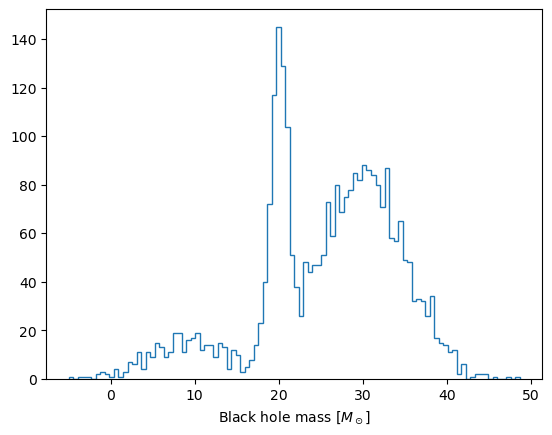

In [2]:
data = np.load('../solutions/formationchannels.npy')
plt.hist(data, bins = 100, histtype='step')
plt.xlabel("Black hole mass $[M_\odot]$")
print(data)

In this exercise we suppose that the above signal (*data & histogram*) is genereted by 10 different events (*models*).
In this case the *models* are take from `GaussianMixture` and through the calculation of AIC we are able to understand the best *models* that fit the *data*

In [3]:
N = np.arange(1,10)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(data) #here N[i] are the n_components
    
print(models)

[GaussianMixture(), GaussianMixture(n_components=2), GaussianMixture(n_components=3), GaussianMixture(n_components=4), GaussianMixture(n_components=5), GaussianMixture(n_components=6), GaussianMixture(n_components=7), GaussianMixture(n_components=8), GaussianMixture(n_components=9)]


Find the value of AIC:

$$ \mathrm{AIC}_M \equiv -2\ln[L^0(M)] + 2k + \frac{2k(k+1)}{N-k-1}, $$

where k is the number of model parameters and N is the numbers of data points.

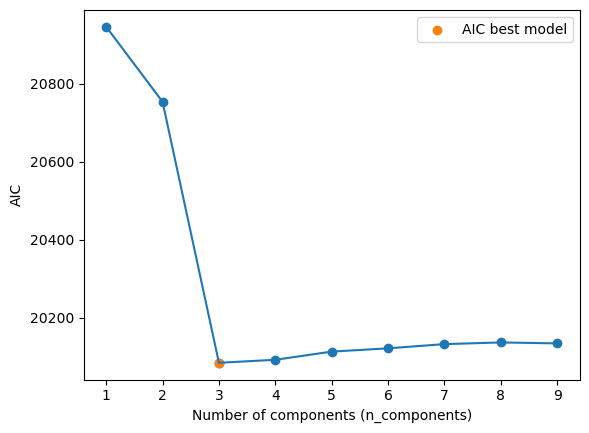

In [4]:
AIC = [m.aic(data) for m in models]
plt.plot(N,AIC)
plt.scatter(N,AIC)
plt.scatter(N[np.argmin(AIC)],AIC[np.argmin(AIC)], label = 'AIC best model')

plt.xlabel('Number of components (n_components)')
plt.ylabel('AIC')
plt.legend()
plt.show()

Now, **let's plot the histogram using the method `score_samples`**.

My points I want to evaluate are saved within array `data` and I have a kernel density estimation (kde), so I call:

- LogProbdata = kde.score_samples(data)
But logprobdata are logarithmic. So I also need to do:

- probdata = np.exp(LogProbdata)

C:\Users\utente\AppData\Local\Temp\ipykernel_2376\2625118356.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,pdf,'--k',color= 'orange')


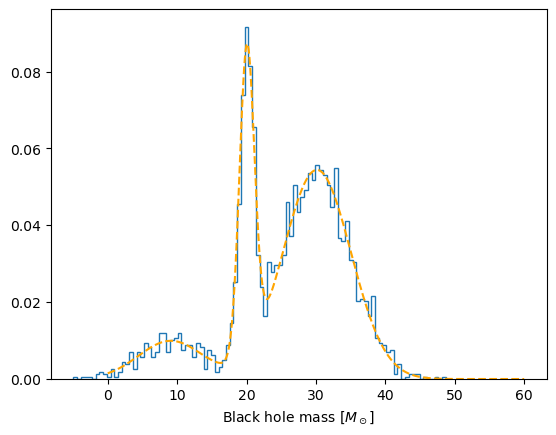

In [5]:
M_best =models[np.argmin(AIC)] 

x = np.linspace(0, 60, 1000)

logL = M_best.score_samples(x.reshape(-1,1))

pdf = np.exp(logL)

plt.hist(data,bins=100,density= True, histtype='step')

plt.xlabel("Black hole mass $[M_\odot]$")
plt.plot(x,pdf,'--k',color= 'orange')


**oss 1**

*`x.reshape` allowed us to create a new type of array, for example:*
- *if I put x.reshape(-1,1), it transform the array in column array.*
- *if I put x.reshape(-2,2), it transform the array in a matrix 2 x 2.*

*So I can work with it like it is a matrix.*


Now, let's **plot the histogram using the method `predict_proba`**.

The method `predict_proba` returns the predicted probabilities of the input features belonging to each category. 

*This is useful when not only do we want to know th category of the input features, but we also want to knoe the model's confidence in its prediction*

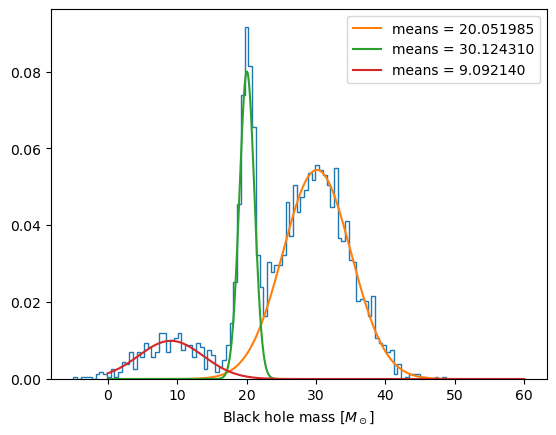

In [6]:
responsibilities = M_best.predict_proba(x.reshape(-1,1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
#pdf_individual = responsbilities * pdf.reshape(-1,1)

means = GaussianMixture(N[np.argmin(AIC)]).fit(data).means_
covs = GaussianMixture(N[np.argmin(AIC)]).fit(data).covariances_
weights = GaussianMixture(N[np.argmin(AIC)]).fit(data).weights_

plt.hist(data,bins=100, density = True, histtype='step')

for i in range(0,N[np.argmin(AIC)]):
    plt.plot(x,pdf_individual[:,i], label='means = %f' %means[i])

plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend()
plt.show()

**oss 1**

*Here, for the data that we are using I ca use both `pdf[:, np.newaxis]` and `pdf.reshape(-1,1)`*

**oss 2**

*What I called 'responsibilities' is the probability that a given event (gravitational-wave event) comes from a given channel. It is given by:*

$$p(j|x_i) = \frac{a_j \mathcal{N(\mu_j,\sigma_j)}}{\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}$$
*--> that's why I need to multiply for the pdf.*

**Now let's see what happend if I am not consider the best estimation of the models**

C:\Users\utente\AppData\Local\Temp\ipykernel_2376\3052329264.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,pdf,'--k',color= 'orange', label= 'N = %i' %n)


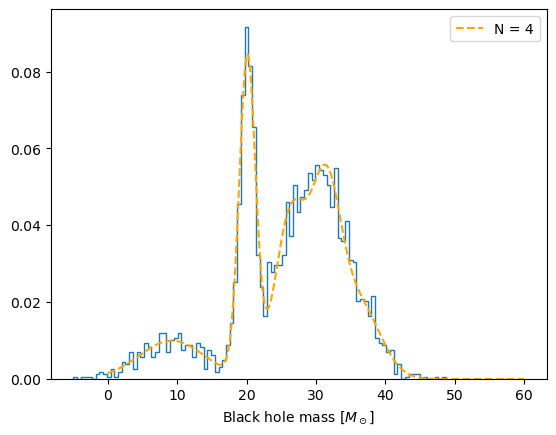

In [7]:
n = 4
M_nobest = models[n]

x = np.linspace(0, 60, 1000)

logL = M_nobest.score_samples(x.reshape(-1,1))

pdf = np.exp(logL)

plt.hist(data,bins=100,density= True, histtype='step')

plt.xlabel("Black hole mass $[M_\odot]$")
plt.plot(x,pdf,'--k',color= 'orange', label= 'N = %i' %n)

plt.legend()

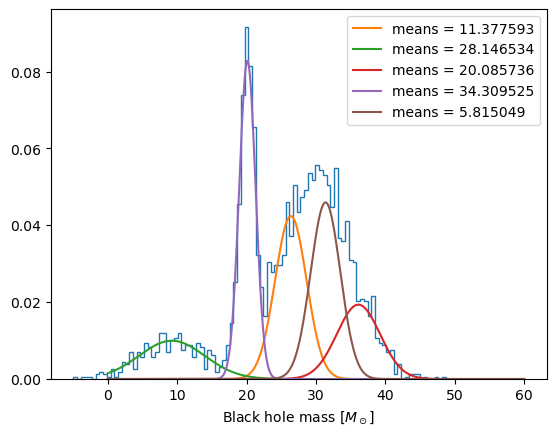

In [8]:
responsibilities = M_nobest.predict_proba(x.reshape(-1,1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
#pdf_individual = responsbilities * pdf.reshape(-1,1)

means = GaussianMixture(N[n]).fit(data).means_
covs = GaussianMixture(N[n]).fit(data).covariances_
weights = GaussianMixture(N[n]).fit(data).weights_

plt.hist(data,bins=100, density = True, histtype='step')

for i in range(0,N[n]):
    plt.plot(x,pdf_individual[:,i], label='means = %f' %means[i])

plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend()
plt.show()